<a href="https://colab.research.google.com/github/charita-dotcom/colab/blob/main/Vaers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
import seaborn as sns

vax_data = pd.read_excel('/content/drive/MyDrive/VAERS_DATA/VAERS_CANDIDATE-VAXINE-SYMPTOMS-DATA.xlsx')
vax_data

,VAERS_ID,STATE,AGE_YRS,SEX,DIED,L_THREAT,RECOVD,V_ADMINBY,VAX_MANU,VAX_DOSE_SERIES,VAX_ROUTE,VAX_SITE,VAX_NAME,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5
0,916600,TX,33.0,F,N,N,Y,PVT,MODERNA,1,IM,LA,COVID19 (COVID19 (MODERNA)),Dysphagia,Epiglottitis,NaN,NaN,NaN
1,916601,CA,73.0,F,N,N,Y,SEN,MODERNA,1,IM,RA,COVID19 (COVID19 (MODERNA)),Anxiety,Dyspnoea,NaN,NaN,NaN
2,916604,TX,47.0,F,N,N,N,PUB,MODERNA,1,IM,LA,COVID19 (COVID19 (MODERNA)),Injection site erythema,Injection site pruritus,Injection site swelling,Injection site warmth,NaN
3,916606,NV,44.0,F,N,N,Y,PVT,MODERNA,1,IM,LA,COVID19 (COVID19 (MODERNA)),Pharyngeal swelling,NaN,NaN,NaN,NaN
4,916608,OH,33.0,M,N,N,N,OTH,MODERNA,1,IM,LA,COVID19 (COVID19 (MODERNA)),Diarrhoea,Nasal congestion,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4711,1039271,WI,90.0,M,Y,N,N,PVT,MODERNA,1,IM,LA,COVID19 (COVID19 (MODERNA)),Death,Fall,Head injury,Injection site ulcer,Malaise
4712,1039304,CA,73.0,M,Y,N,N,SEN,MODERNA,1,IM,LA,COVID19 (COVID19 (MODERNA)),Blood sodium normal,Blood urea increased,Body temperature increased,Death,Dysphagia
4713,1039597,na,64.0,M,Y,N,N,OTH,PFIZER\BIONTECH,1,IM,RA,COVID19 (COVID19 (PFIZER-BIONTECH)),Death,Decubitus ulcer,Pneumonia aspiration,Sepsis,NaN
4714,1040005,NY,72.0,F,Y,N,N,PHM,MODERNA,2,IM,LA,COVID19 (COVID19 (MODERNA)),Death,Unresponsive to stimuli,NaN,NaN,NaN


In [ ]:
#rows and columns
vax_data.shape

(4716, 18)

In [ ]:
#Analysis Starts

# Analysis Starts

In [ ]:
#vax_data.info()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


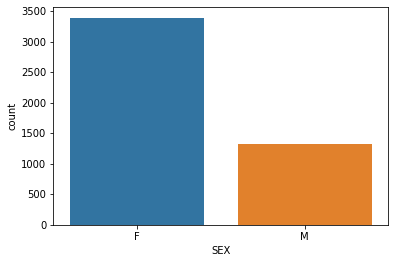

In [ ]:
#Gender based analysis
# sns.barplot(vax_data.SEX, vax_data.index)
sns.countplot(vax_data.SEX)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


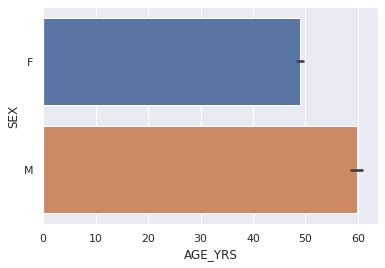

In [ ]:
sns.set(color_codes = True)
sns.barplot(vax_data.AGE_YRS, vax_data.SEX)

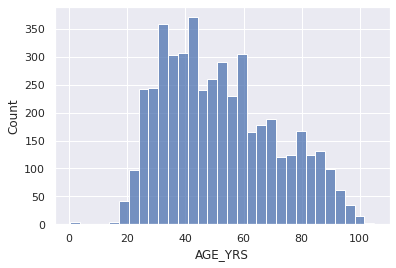

In [ ]:
# Age Analysis of VAERS Data
sns.histplot(vax_data.AGE_YRS)

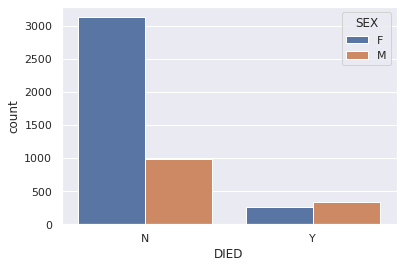

In [ ]:
#DIED Status of Entities comparing with Gender Analysis
sns.countplot(x="DIED",hue="SEX",data=vax_data)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


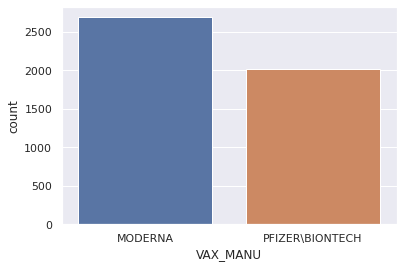

In [ ]:
#Comparitive Analysis of Vaccines
sns.countplot(vax_data.VAX_MANU)

In [ ]:
#unique vaccines
vax_data.VAX_NAME.unique()

array(['COVID19 (COVID19 (MODERNA))',
       'COVID19 (COVID19 (PFIZER-BIONTECH))'], dtype=object)

In [ ]:
#Vaxcine
vax_data.VAX_DOSE_SERIES.unique()

array([1, 3, 2, 5, 4])

In [ ]:
#unique values in each column
vax_data.nunique()

VAERS_ID           4716
STATE                54
AGE_YRS              93
SEX                   2
DIED                  2
L_THREAT              2
RECOVD                2
V_ADMINBY             9
VAX_MANU              2
VAX_DOSE_SERIES       5
VAX_ROUTE             7
VAX_SITE              9
VAX_NAME              2
Symptom 1           596
Symptom 2           676
Symptom 3           659
Symptom 4           617
Symptom 5           575
dtype: int64

In [ ]:
#Null Values
vax_data.isnull().sum()

VAERS_ID              0
STATE                 0
AGE_YRS               0
SEX                   0
DIED                  0
L_THREAT              0
RECOVD                0
V_ADMINBY             0
VAX_MANU              0
VAX_DOSE_SERIES       0
VAX_ROUTE             0
VAX_SITE              0
VAX_NAME              0
Symptom 1             0
Symptom 2           549
Symptom 3          1163
Symptom 4          1762
Symptom 5          2332
dtype: int64

In [ ]:
# sns.stripplot(vax_data.index, vax_data.SEX)

#Data Modification -> From String to Integer Values

In [ ]:
def convert_to_int(arr):
  count = 1
  for i in arr:
    if i is None:
      print('"'+i+'":'+str(count)+',', end = '')
    else:
      print('"'+i+'":'+str(count)+',', end = '')
    count = count+1

convert_to_int(vax_data['STATE'].unique())

"TX":1,"CA":2,"NV":3,"OH":4,"TN":5,"VA":6,"NC":7,"NY":8,"GA":9,"NJ":10,"LA":11,"IL":12,"MD":13,"ME":14,"MA":15,"MI":16,"CT":17,"FL":18,"OK":19,"AR":20,"ID":21,"IN":22,"PA":23,"AZ":24,"MN":25,"MO":26,"CO":27,"UT":28,"na":29,"AL":30,"NE":31,"RI":32,"MS":33,"IA":34,"KS":35,"MT":36,"WI":37,"OR":38,"PR":39,"WV":40,"WA":41,"ND":42,"SC":43,"VT":44,"NM":45,"KY":46,"SD":47,"HI":48,"NH":49,"WY":50,"AK":51,"DE":52,"DC":53,"GU":54,

In [ ]:
vax_data.head()

,VAERS_ID,STATE,AGE_YRS,SEX,DIED,L_THREAT,RECOVD,V_ADMINBY,VAX_MANU,VAX_DOSE_SERIES,VAX_ROUTE,VAX_SITE,VAX_NAME,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5
0,916600,TX,33.0,F,N,N,Y,PVT,MODERNA,1,IM,LA,COVID19 (COVID19 (MODERNA)),Dysphagia,Epiglottitis,NaN,NaN,NaN
1,916601,CA,73.0,F,N,N,Y,SEN,MODERNA,1,IM,RA,COVID19 (COVID19 (MODERNA)),Anxiety,Dyspnoea,NaN,NaN,NaN
2,916604,TX,47.0,F,N,N,N,PUB,MODERNA,1,IM,LA,COVID19 (COVID19 (MODERNA)),Injection site erythema,Injection site pruritus,Injection site swelling,Injection site warmth,NaN
3,916606,NV,44.0,F,N,N,Y,PVT,MODERNA,1,IM,LA,COVID19 (COVID19 (MODERNA)),Pharyngeal swelling,NaN,NaN,NaN,NaN
4,916608,OH,33.0,M,N,N,N,OTH,MODERNA,1,IM,LA,COVID19 (COVID19 (MODERNA)),Diarrhoea,Nasal congestion,NaN,NaN,NaN


In [ ]:
# Converting Symptoms (Str -> Num)
symptoms = np.array(np.concatenate((vax_data['Symptom 1'].unique(), vax_data['Symptom 2'].unique(), vax_data['Symptom 3'].unique(), vax_data['Symptom 4'].unique(), vax_data['Symptom 5'].unique())))
# len(symptoms) #len: 3127

# symp = list(set(symptoms))
# # len(symp) #1493
# avi = sorted(symptoms)
# avi
# convert_to_int(np.array(symp))


In [ ]:
# errorcode(vaxdat);

In [ ]:
vax_data.AGE_YRS.unique()

array([ 33.  ,  73.  ,  47.  ,  44.  ,  71.  ,  18.  ,  29.  ,  38.  ,
        35.  ,  24.  ,  28.  ,  65.  ,  25.  ,  31.  ,  41.  ,  63.  ,
        61.  ,  56.  ,  57.  ,  27.  ,  22.  ,  49.  ,  32.  ,  46.  ,
        42.  ,  58.  ,  60.  ,  37.  ,  53.  ,  59.  ,  39.  ,  26.  ,
        20.  ,  51.  ,  52.  ,  40.  ,  36.  ,  69.  ,  34.  ,  64.  ,
        50.  ,  43.  ,  23.  ,  48.  ,  30.  ,  45.  ,  68.  ,  54.  ,
        21.  ,  88.  ,  67.  ,  55.  ,  78.  ,  62.  ,  66.  ,  82.  ,
        19.  ,  74.  ,  70.  ,  92.  ,  76.  ,  72.  ,  97.  ,  84.  ,
        81.  ,  77.  ,  93.  ,  85.  ,  83.  ,  87.  ,  80.  ,  75.  ,
        90.  ,  91.  ,  79.  ,  89.  ,  94.  ,   0.33,   0.5 ,   0.25,
       103.  ,  17.  ,  96.  ,  86.  ,  16.  ,   1.08,  95.  ,  98.  ,
        99.  , 101.  , 100.  , 105.  , 102.  ])

In [ ]:
#State Values Convertion
vax_data['STATE'] = vax_data['STATE'].map({"TX":1,"CA":2,"NV":3,"OH":4,"TN":5,"VA":6,"NC":7,"NY":8,"GA":9,"NJ":10,"LA":11,"IL":12,"MD":13,"ME":14,"MA":15,"MI":16,"CT":17,"FL":18,"OK":19,"AR":20,"ID":21,"IN":22,"PA":23,"AZ":24,"MN":25,"MO":26,"CO":27,"UT":28,"na":29,"AL":30,"NE":31,"RI":32,"MS":33,"IA":34,"KS":35,"MT":36,"WI":37,"OR":38,"PR":39,"WV":40,"WA":41,"ND":42,"SC":43,"VT":44,"NM":45,"KY":46,"SD":47,"HI":48,"NH":49,"WY":50,"AK":51,"DE":52,"DC":53,"GU":54})

In [ ]:
#DIED Status -> N -- 0, Y -- 1
vax_data['DIED'] = vax_data['DIED'].map({'N':0, 'Y':1})

In [ ]:
#Vaccine Name Mapping -> Moderna -- 1, Pfizer-Biontech -- 2
#vax_data['VAX_NAME'].unique()
vax_data['VAX_NAME'] = vax_data['VAX_NAME'].map({'COVID19 (COVID19 (MODERNA))':1, 'COVID19 (COVID19 (PFIZER-BIONTECH))':2})

In [ ]:
#Life Threat Status -> N -- 0, Y -- 1
vax_data['L_THREAT'] = vax_data['L_THREAT'].map({'N':0, 'Y':1})

In [ ]:
#Recovery Status -> N -- 0, Y -- 1
vax_data['RECOVD'] = vax_data['RECOVD'].map({'N':0, 'Y':1})

In [ ]:
#Age Group Classification
##Children -> 0-12
##Adolescence -> 13-18
##Adult-Young -> 19-30
##Adult-Mid -> 31-59
##Adult-Senior -> 60 above
def age_to_age_group(i):
    if(i<=12):
      return 'child'
    if(i>12 and i<=18):
      return 'adolescence'
    if(i>18 and i<=30):
      return 'young_adult'
    if(i>30 and i<=59):
      return 'mid_adult'
    if(i>59):
       return "senior_adult"

vax_data['AGE_GROUP'] =vax_data.AGE_YRS.apply(age_to_age_group)
# vax_data.drop(['mid_adult', 'seinor_adult', 'adolescence'	, 'young_adult', 'child'], axis=1, inplace=True)
# vax_data


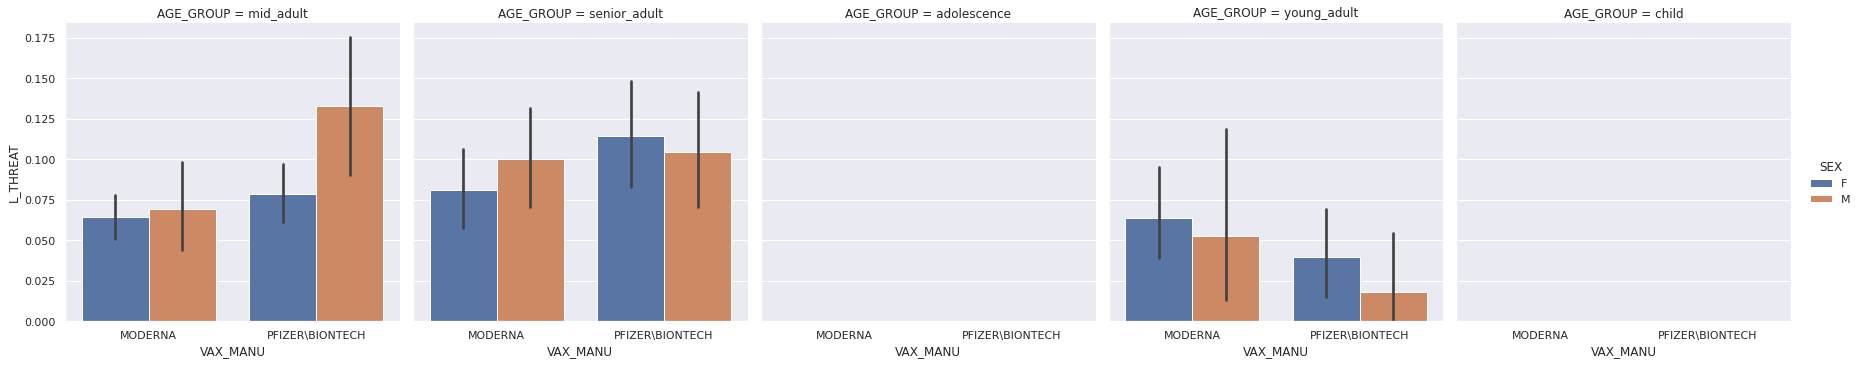

In [ ]:
sns.catplot(x="VAX_MANU", y="L_THREAT", hue="SEX", col="AGE_GROUP", data=vax_data, kind="bar");

In [ ]:
# vax_data.AGE_GROUP.unique()
vax_data.pivot_table(index=['AGE_GROUP'], aggfunc='size')

AGE_GROUP
adolescence       14
child              4
mid_adult       2518
senior_adult    1563
young_adult      617
dtype: int64

In [ ]:
#Age Group Convertion
vax_data['AGE_GROUP'] = vax_data['AGE_GROUP'].map({'child': 1, 'adolescence': 2, 'young_adult': 3, 'mid_adult': 4, "seinor_adult": 5})

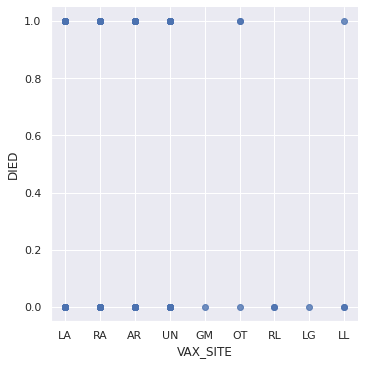

In [ ]:
sns.lmplot(x='VAX_SITE', y='DIED', data=vax_data, fit_reg=False)

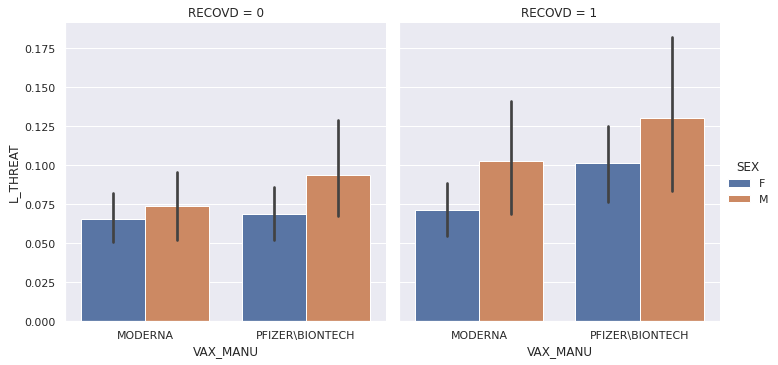

In [ ]:
# sns.lmplot(x='STATE', y='DIED', data=vax_data, fit_reg=False)

# sns.lmplot(x='VAX_MANU', y='VAX_DOSE_SERIES', data=vax_data,
#            fit_reg=False)
sns.catplot(x="VAX_MANU", y="L_THREAT", hue="SEX", col="RECOVD", data=vax_data, kind="bar");

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


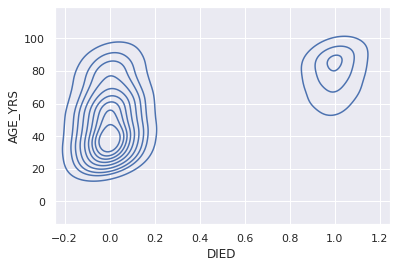

In [ ]:
# sns.lmplot(x='Symptom 1', y='L_THREAT', data=vax_data, fit_reg=False)
sns.kdeplot(vax_data.DIED, vax_data.AGE_YRS)

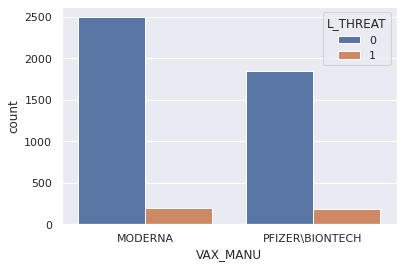

In [ ]:
# sns.swarmplot(x='L_THREAT', y='AGE_YRS', data=vax_data)
sns.countplot(x="VAX_MANU",hue="L_THREAT",data=vax_data)

In [ ]:
#SEX Convertion -> M -- 1, F -- 0
vax_data['SEX'] = vax_data['SEX'].map({'F': 0, 'M': 1})

##Dropping Unwanted Columns

In [ ]:
vax_data.drop('V_ADMINBY', axis=1, inplace=True)

In [ ]:
vax_data.drop('VAX_MANU', axis=1, inplace=True)

In [ ]:
#Dropping the Symptoms, Only 50% Implemented with out using Symptoms Data
vax_data.drop(['Symptom 1', 'Symptom 2', 'Symptom 3', 'Symptom 4', 'Symptom 5'], axis=1, inplace=True)

In [ ]:
vax_data.VAX_SITE.unique()

array(['LA', 'RA', 'AR', 'UN', 'GM', 'OT', 'RL', 'LG', 'LL'], dtype=object)

In [ ]:
vax_data.VAX_SITE = vax_data.VAX_SITE.map({'LA':1, 'RA':2, 'AR':3, 'UN':4, 'GM':5, 'OT':6, 'RL':7, 'LG':8, 'LL':9})

In [ ]:
vax_data.VAX_ROUTE.unique()

array(['IM', 'SYR', 'JET', 'UN', 'SC', 'OT', 'ID'], dtype=object)

In [ ]:
vax_data.VAX_ROUTE = vax_data.VAX_ROUTE.map({'IM':1, 'SYR':2, 'JET':3, 'ID':4, 'SC':5, 'OT':6, 'UN':7})

In [ ]:
vax_data.head()

,VAERS_ID,STATE,AGE_YRS,SEX,DIED,L_THREAT,RECOVD,VAX_DOSE_SERIES,VAX_ROUTE,VAX_SITE,VAX_NAME,AGE_GROUP
0,916600,1,33.0,0,0,0,1,1,1,1,1,4.0
1,916601,2,73.0,0,0,0,1,1,1,2,1,NaN
2,916604,1,47.0,0,0,0,0,1,1,1,1,4.0
3,916606,3,44.0,0,0,0,1,1,1,1,1,4.0
4,916608,4,33.0,1,0,0,0,1,1,1,1,4.0


In [ ]:
vax_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4716 entries, 0 to 4715
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   VAERS_ID         4716 non-null   int64  
 1   STATE            4716 non-null   int64  
 2   AGE_YRS          4716 non-null   float64
 3   SEX              4716 non-null   int64  
 4   DIED             4716 non-null   int64  
 5   L_THREAT         4716 non-null   int64  
 6   RECOVD           4716 non-null   int64  
 7   VAX_DOSE_SERIES  4716 non-null   int64  
 8   VAX_ROUTE        4716 non-null   int64  
 9   VAX_SITE         4716 non-null   int64  
 10  VAX_NAME         4716 non-null   int64  
 11  AGE_GROUP        3153 non-null   float64
dtypes: float64(2), int64(10)
memory usage: 442.2 KB


#Machine Learning Model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

X = vax_data.drop(columns=['VAERS_ID', 'AGE_GROUP', 'DIED', 'L_THREAT'])
y = vax_data['DIED']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)
# logReg = LogisticRegression()

###ML using Decision Tree Classifier

In [ ]:
model = DecisionTreeClassifier()
model.fit(X, y)

Dession_Tree_Predictions = model.predict(X_test)

Dession_Tree_Predictions_Score = accuracy_score(y_test, Dession_Tree_Predictions)*100

Dession_Tree_Predictions_Score

99.15254237288136

In [ ]:
# predictions = model.predict([[1, 30, 1, 0, 1, 1, 1, 2, 1], [1, 30, 1, 1, 0, 1, 1, 2, 1]])


In [ ]:
#tree.export_graphviz(model, out_file='adverse_effects_predictor.dot', feature_names=['AGE_YRS', 'SEX', 'STATE', 'VAX_NAME', 'VAX_DOSE_SERIES', 'VAX_ROUTE', 'VAX_SITE'])

###ML Using Logical Regression

In [ ]:
logReg = LogisticRegression()
logReg.fit(X_train, y_train)
logReg_Predictions = logReg.predict(X_test)

# logReg_Predictions
# classification_report(y_test, logreg.predict(X_test))

LogReg_Predictions_Score = accuracy_score(y_test,logReg_Predictions)*100
LogReg_Predictions_Score

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


90.46610169491525

###ML Using Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
random_forest_predictions = random_forest.predict(X_test)
print(classification_report(y_test, random_forest.predict(X_test)))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       406
           1       0.64      0.58      0.61        66

    accuracy                           0.90       472
   macro avg       0.79      0.76      0.77       472
weighted avg       0.89      0.90      0.89       472



In [ ]:
Random_Forest_Predictions_Score = accuracy_score(y_test,random_forest_predictions)*100
Random_Forest_Predictions_Score

89.61864406779661

#Symptoms Implementation

In [ ]:
symp_data = pd.read_excel('/content/drive/MyDrive/VAERS_DATA/VAERS_CANDIDATE-VAXINE-SYMPTOMS-DATA.xlsx')
symp_data.shape

(4716, 18)

In [ ]:
symp_data['Symptom 1'].unique()

array(['Dysphagia', 'Anxiety', 'Injection site erythema',
       'Pharyngeal swelling', 'Diarrhoea', 'Vaccination site erythema',
       'Rash', 'Blood pressure decreased', 'Blood pressure increased',
       'Chills', 'Injection site pain', 'Arthralgia', 'Erythema', 'Cough',
       'Asthenia', 'Headache', 'Back pain', 'Injection site swelling',
       'Body temperature increased', 'Flushing', 'Hypoaesthesia oral',
       'Plicated tongue', 'Pruritus', 'Burning sensation', 'Anosmia',
       'Anaphylactic reaction', 'Feeling cold', 'Chest X-ray normal',
       'Axillary pain', 'Injection site cellulitis', 'Myalgia',
       'Lymphadenopathy', 'Computerised tomogram normal', 'Fatigue',
       'Electrocardiogram abnormal', 'Fall',
       'Ophthalmological examination', 'Injection site bruising',
       'Urticaria', 'Inflammation', 'Dizziness', 'Feeling hot',
       'Tinnitus', 'Axillary mass', 'Injection site reaction',
       'Administration site joint movement impairment',
       'Amino a